### Setup check

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
hello = tf.constant('hello world')

In [13]:
sess = tf.Session()

In [14]:
print(sess.run(hello))

b'hello world'


In [15]:
import os
os.getcwd()

'C:\\Mahaanand\\Machine Learning\\deep_learning\\tensorflow_bootcamp_jp\\Tensorflow-Bootcamp-master\\my_learning_notebooks'

### Manual creation of a Neural Network

In [24]:
class Operation():
    
    def __init__(self, input_nodes = []):
        
        self.input_nodes = input_nodes # list of input nodes
        self.output_nodes = [] # list of nodes consuming the node's output
    
        for node in input_nodes:
            print(node)
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
        
    def compute(self):
        # this method will be overwritten by the methods that inherits from this class
        
        pass

In [25]:
# basic example operations
class add(Operation):
    
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

class multiply(Operation):
    
    def __init__(self, a, b):
        super().__init__([a,b])
        
    def compute(self, a_var, b_var):
        self.inputs = [a_var, b_var]
        return a_var * b_var
    
class matrix_multiplication(Operation):
    
    def __init__(self, a, b):
        super().__init__([a,b])
        
    def compute(self, a_var, b_var):
        self.inputs = [a_var, b_var]
        return a_var.dot(b_var)

In [26]:
# Placeholders
class Placeholder():
    """
    A placeholder is a node that needs to provide an input to compute the output in graph
    """
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [27]:
# variables
class Variable():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [28]:
# creating a graph
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.variables = []
        self.placeholders = []
    
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

In [29]:
# creating a basic graph
g = Graph()
g.set_as_default()

In [30]:
# first variable
A = Variable(10)

In [31]:
#second varaible
b = Variable(1)

In [32]:
# creating a placeholder for x
x = Placeholder()

In [33]:
_default_graph.variables

[<__main__.Variable at 0x1cd3ea9cd88>, <__main__.Variable at 0x1cd3eab7288>]

In [34]:
y = multiply(A,x)

In [35]:
z = add(y, b)

In [36]:
_default_graph.placeholders

In [37]:
b.output_nodes

In [38]:
# creating a session
# creating a post order traversal function
import numpy as np
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [41]:
class Session:
    
    def run(self, operation, feed_dict= {}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output= np.array(node.output)
                
        return operation.output

In [42]:
sess = Session()
result = sess.run(operation=z, feed_dict={x:10})

In [43]:
result

101

### Tensorflow basics

In [2]:
print(tf.__version__)

2.0.0


In [3]:
# creating tensors
hello = tf.constant('Hello ')

In [4]:
print(type(hello))

<class 'tensorflow.python.framework.ops.Tensor'>


In [5]:
# creating another tensor
world = tf.constant('World')

In [6]:
# concatenating two strings
result = hello + world

In [7]:
result

<tf.Tensor 'add:0' shape=() dtype=string>

In [8]:
# results won't be evaluated until we run it in the session
with tf.Session() as sess:
    result = sess.run(result)

In [9]:
result

b'Hello World'

In [10]:
# creating simple operations
my_const = tf.constant(10)
my_mat = tf.fill((4,4), 10)
my_zeros = tf.zeros((4,4))
my_ones = tf.ones((4,4))
myrand_n = tf.random_normal((4,4), mean=0, stddev=1.0)
myrand_u = tf.random_uniform((4,4), minval=0, maxval=1)

In [11]:
my_operations = [my_const, my_mat, my_zeros, my_ones, myrand_n, myrand_u]

In [12]:
# creating interactive session only for notebook settings.
sess = tf.InteractiveSession()

In [14]:
for i in my_operations:
    print(sess.run(i))
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.57376975  0.6706736   0.16500258  1.0655239 ]
 [-0.19411604  1.3401024   0.26646617  0.19014889]
 [ 1.1277766   1.1505282  -0.6091016  -1.2744253 ]
 [-0.87968343  0.7150426   0.88781476  0.00250637]]


[[0.15476239 0.19964433 0.30328906 0.55949414]
 [0.57175684 0.41326022 0.8123411  0.20941651]
 [0.618485   0.43402302 0.48332167 0.8965038 ]
 [0.9152123  0.8604113  0.853304   0.28051007]]




#### Matrix multiplication

In [15]:
a = tf.constant([[1,2], [3,4]])

In [16]:
# to get the shape of a 
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [17]:
b = tf.constant([[10], [100]])

In [18]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [19]:
result = tf.matmul(a, b)

In [21]:
# this is another method of evaluating
result.eval()

array([[210],
       [430]])

### Tensorflow Graphs

In [22]:
# simple example for tensorflow graphs
n1 = tf.constant(1)
n2 = tf.constant(2)

n3 = n1 + n2

In [23]:
with tf.Session() as sess:
    result = sess.run(n3)
print(result)

3


In [24]:
# getting the memory location of default graph
print(tf.get_default_graph())

In [25]:
# creating a new graph
g = tf.Graph()

In [26]:
print(g)

In [27]:
# setting a graph as default:
graph_one = tf.get_default_graph()
graph_two = tf.Graph()

In [29]:
# checking for default graph:
graph_one is tf.get_default_graph()

True

In [30]:
graph_two is tf.get_default_graph()

False

In [31]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


### Tensorflow variables

In [32]:
# creating a tensor
my_randn = tf.random_uniform((4,4), 0, 1)

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
# creating a variable
my_var = tf.Variable(initial_value=my_randn)

In [34]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


# closing an interactive session
tf.InteractiveSession.close(sess)

In [44]:
# creating an interactive session
sess = tf.InteractiveSession()

In [46]:
# It is always important to initialize all the global variable before initializing any other variables
init = tf.global_variables_initializer()
init.run()

In [47]:
# now running the session won't throw an pre-conditioned error
sess.run(my_var)

array([[0.6716094 , 0.12952292, 0.95934653, 0.7896012 ],
       [0.7654313 , 0.41265905, 0.02951872, 0.2031517 ],
       [0.2673689 , 0.31970882, 0.9778068 , 0.20653176],
       [0.5013279 , 0.01981068, 0.5288855 , 0.4526373 ]], dtype=float32)

### Tensorflow placeholders

#### Simple neural network

In [48]:
ph = tf.placeholder(tf.float32)

In [51]:
ph # the main argument to a placeholder is datatype

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [52]:
ph_1 = tf.placeholder(tf.int32, shape=(4,4))

In [53]:
ph_1

<tf.Tensor 'Placeholder_1:0' shape=(4, 4) dtype=int32>

### Tensorflow manual neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# setting random seed
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
# creating the data setup
rand_a = np.random.uniform(0, 100, (5,5))
rand_b = np.random.uniform(0, 100, (5,1))

In [4]:
# placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [5]:
# creating operations
add_op = a + b
mul_op = a * b

In [6]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict = {a: rand_a, b: rand_b})
    print(add_result)
    
    print('\n')
    
    mul_result = sess.run(mul_op, feed_dict = {a: rand_a, b: rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


#### creating a manual neural network

In [7]:
# creating number of features and dense neurons
n_features = 10
n_dense_neurons = 3

In [8]:
# placeholder vreaion 
x = tf.placeholder(tf.float32, shape=(None, n_features))

In [9]:
# variables for w and b
b = tf.Variable(tf.ones([n_dense_neurons]))

w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [10]:
# creating operations
xw = tf.matmul(x, w)

z = tf.add(xw, b)

In [11]:
# creating activation function
a = tf.sigmoid(z)                             

In [12]:
#initializing the gloabal variable
init = tf.global_variables_initializer()

In [13]:
# running the session
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})

In [14]:
print(layer_out)

[[0.75709796 0.68604666 0.792538  ]]


#### creating a full manual network 

In [15]:
#data setup
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [16]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [17]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [18]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

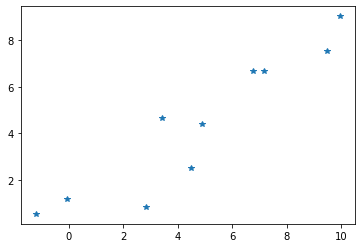

In [19]:
plt.plot(x_data, y_label, '*')

we are trying to create a best fit line for the above data.

y = mx + b => our fit line equation

In order to assign the random weights we are initializing random variable weights

In [20]:
# creating random weights of the variables
np.random.rand(2)

array([0.44236813, 0.87758732])

In [21]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [22]:
# cost function
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [23]:
# creating an optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [24]:
# Initializing the global variables
init = tf.global_variables_initializer()

In [25]:
# creating a session and predict the best parameters
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(100):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b])

In [26]:
final_slope

0.7535087

In [27]:
final_intercept

0.8372925

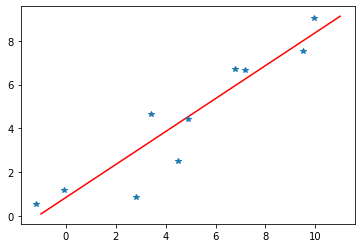

In [28]:
# evaluating the results
x_test = np.linspace(-1, 11, 10)
y_pred = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred, 'r')
plt.plot(x_data, y_label, '*')

### Tensorflow Regression

#### Basic regression

In [29]:
# importing pandas library
import pandas as pd

In [30]:
# creating data
x_data = np.linspace(0.0, 10.0, 1000000)

In [31]:
# creating noise
noise = np.random.randn(len(x_data))

In [32]:
b = 5

y_true = (0.5 * x_data) + 5 + noise

In [33]:
# creating my data
x_df = pd.DataFrame(data=x_data, columns=['X_data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [34]:
master_df = pd.concat([x_df, y_df], axis=1)

In [35]:
master_df.head()

,X_data,Y
0,0.00000,4.968421
1,0.00001,5.649831
2,0.00002,7.154856
3,0.00003,4.389756
4,0.00004,4.244695


In [36]:
master_df.shape

(1000000, 2)

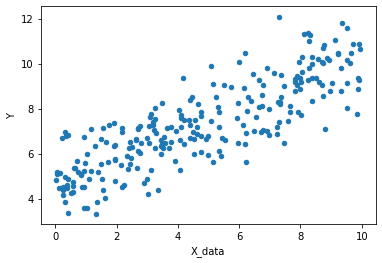

In [37]:
# plotting the master data
master_df.sample(n=250).plot(kind='scatter', x='X_data', y='Y')

In [38]:
# taking the data in batches and feed the data to the neural network
batch_size = 8

# creating variables
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [39]:
# creating placeholders
x_ph = tf.placeholder(tf.float32, [batch_size])
y_ph = tf.placeholder(tf.float32, [batch_size])

In [41]:
# creating the graph
y_model = m*x_ph + b

# creating the loss function
error = tf.reduce_sum(tf.square(y_ph - y_model))

In [42]:
# creating the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [43]:
# initializing the global variables
init = tf.global_variables_initializer()

In [49]:
# creating session
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(10000):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m, b])

In [50]:
model_m

0.48581567

In [51]:
model_b

4.997363

In [52]:
# evaluating results
y_hat = x_data * model_m + model_b

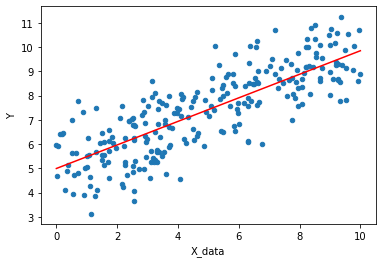

In [53]:
# plotting the fit line
master_df.sample(n=250).plot(kind='scatter', x='X_data', y='Y')
plt.plot(x_data, y_hat, 'r')

### tf.Estimator API

In [54]:
# creating the feature columns
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [55]:
# creating an estimator model
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nitro\\AppData\\Local\\Temp\\tmp76ugk0ed', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B4ED271188>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
# splitting the data into train and test set
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [59]:
print(x_train.shape)

(700000,)


In [60]:
# setting up estimator inputs
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)
test_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [61]:
# training the model estimator
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\nitro\AppData\Local\Temp\tmp76ugk0ed\model.ckpt.
INFO:tensorflow:loss = 386.09723, step = 1
INFO:tensorf

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
# evaluating the train data
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-28T20:29:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmp76ugk0ed\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-28-20:29:03
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0675749, global_step = 1000, label/mean = 7.5061226, loss = 8.540599, prediction/mean = 7.3571587
INFO:tensorflow:Saving 'checkpoint_pat

In [65]:
# evaluating the test metrics
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-28T20:30:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmp76ugk0ed\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-28-20:30:30
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0390162, global_step = 1000, label/mean = 7.4655814, loss = 8.31213, prediction/mean = 7.3362575
INFO:tensorflow:Saving 'checkpoint_path

In [66]:
print(f"train_metrics: {train_metrics}")
print(f"test_metrics: {test_metrics}")

train_metrics: {'average_loss': 1.0675749, 'label/mean': 7.5061226, 'loss': 8.540599, 'prediction/mean': 7.3571587, 'global_step': 1000}
test_metrics: {'average_loss': 1.0390162, 'label/mean': 7.4655814, 'loss': 8.31213, 'prediction/mean': 7.3362575, 'global_step': 1000}


In [67]:
# predicting the model with unseen data
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': np.linspace(0, 10, 10)}, shuffle=False)

list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmp76ugk0ed\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4629197], dtype=float32)},
 {'predictions': array([5.1057944], dtype=float32)},
 {'predictions': array([5.748669], dtype=float32)},
 {'predictions': array([6.3915434], dtype=float32)},
 {'predictions': array([7.034418], dtype=float32)},
 {'predictions': array([7.677293], dtype=float32)},
 {'predictions': array([8.320168], dtype=float32)},
 {'predictions': array([8.963042], dtype=float32)},
 {'predictions': array([9.605917], dtype=float32)},
 {'predictions': array([10.248791], dtype=float32)}]

In [68]:
predictions = [x['predictions'] for x in estimator.predict(input_fn=input_fn_predict)]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmp76ugk0ed\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


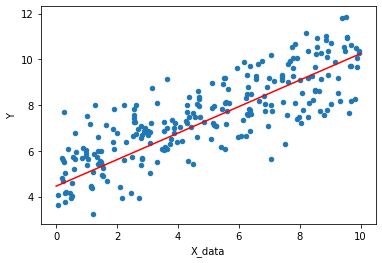

In [73]:
# plotting the predictions
master_df.sample(n=250).plot(kind='scatter', x='X_data', y='Y')
plt.plot(np.linspace(0,10,10), predictions, 'r')

### Tensorflow classification problem

In [56]:
# importing the dataset
import pandas as pd
diabetes_df = pd.read_csv('../02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [57]:
diabetes_df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [58]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [59]:
diabetes_df.shape

(768, 10)

In [60]:
diabetes_df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [61]:
diabetes_df.dtypes

Number_pregnant            int64
Glucose_concentration    float64
Blood_pressure           float64
Triceps                  float64
Insulin                  float64
BMI                      float64
Pedigree                 float64
Age                        int64
Class                      int64
Group                     object
dtype: object

#### Preprocessing

In [62]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [63]:
# normalizing the data
diabetes_df[cols_to_norm] = diabetes_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [64]:
diabetes_df.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


#### Feature columns

In [65]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [78]:
# creating the continuous features
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glucose_conc = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressure = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [79]:
# creating categorical features
group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A', 'B', 'C', 'D'])
# Alternative
#lternative_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [80]:
# converiting the age variable into a categorical variable
import matplotlib.pyplot as plt
%matplotlib inline

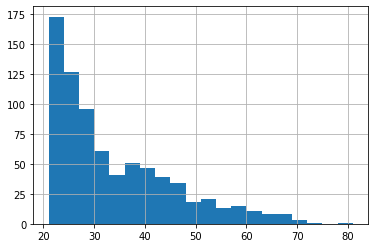

In [81]:
diabetes_df['Age'].hist(bins=20)

In [82]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [83]:
# creating a feature list
feature_columns = [num_preg, glucose_conc, blood_pressure, triceps, insulin, bmi, pedigree, group, age_buckets]

### Splitting the data

In [84]:
X = diabetes_df.drop('Class', axis=1)
y = diabetes_df['Class']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [87]:
# creating the input function
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [88]:
# creating the model
estimator_model = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nitro\\AppData\\Local\\Temp\\tmpv1wg60yv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023BFE29F9C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [90]:
#training the model
estimator_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmpv1wg60yv\model.ckpt-0
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\nitro\AppData\Local\Temp\tmpv1wg60yv\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 233.009
INFO:tensorflow:loss = 4.4676027, step = 101 (0.429 sec)
INFO:tensorflow:global_step/sec: 361.781
INFO:tensorflow:loss = 5.590623, step = 201 (0.281 sec)
INFO:tensorflow:global_step/sec: 314.457
INFO:tensorflow:loss = 6.684064, step = 301 (0.322 sec)
INFO:tensorflow:global_step/sec: 326.746
INFO:tensorflow:loss = 7.9171457, step = 401 (0.304 sec)
INFO:tensorflow:global_step/sec: 365.761
INFO:tensorflow

#### Evaluating the model using test data

In [91]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [92]:
#evaluating the model
results = estimator_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-02T18:00:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmpv1wg60yv\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-02-18:00:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72047246, accuracy_baseline = 0.65748036, auc = 0.7857388, auc_precision_recall = 0.62733525, average_loss = 0.53386587, global_step = 1000, label/mean = 0.34251967, loss = 5.215459, precision = 0.6, prediction/mean = 0.37774578, recall = 0.55172414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\nitro\AppData\Local\Temp\tmpv1wg60yv\model.ckpt-1000


In [93]:
results

{'accuracy': 0.72047246,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7857388,
 'auc_precision_recall': 0.62733525,
 'average_loss': 0.53386587,
 'label/mean': 0.34251967,
 'loss': 5.215459,
 'precision': 0.6,
 'prediction/mean': 0.37774578,
 'recall': 0.55172414,
 'global_step': 1000}

#### Predicting using the test data

In [94]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [97]:
# prediciting the data
predictions = estimator_model.predict(pred_input_func)

In [98]:
# checking the predictions
list(predictions)[1:10]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmpv1wg60yv\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.574632], dtype=float32),
  'logistic': array([0.6398313], dtype=float32),
  'probabilities': array([0.36016873, 0.6398313 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.34854394], dtype=float32),
  'logistic': array([0.41373557], dtype=float32),
  'probabilities': array([0.58626443, 0.41373554], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.77308553], dtype=float32),
  'logistic': array([0.31581205], dtype=float32),
  'probabilities': array([0.684188  , 0.31581202], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},

#### DNN classifier

In [100]:
# before training the model we have to convert the group to embedded column
embedded_group_column = tf.feature_column.embedding_column(group, dimension=4)

In [102]:
feature_columns = [num_preg, glucose_conc, blood_pressure, triceps, insulin, bmi, pedigree, embedded_group_column, age_buckets]

In [103]:
# creating the model
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nitro\\AppData\\Local\\Temp\\tmpjpwjvn7k', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023BFD8A9248>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [104]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\nitro\AppData\Local\Temp\tmpjpwjvn7k\model.ckpt.
INFO:tensorflow:loss = 7.0726595, step = 1
INFO:tensorflow:global_step/sec: 239.864
INFO:tensorflow:loss = 5.794103, step = 101 (0.419 sec)
INFO:tensorflow:global_step/sec: 354.718
INFO:tensorflow:loss = 7.065798, step = 201 (0.291 sec)
INFO:tensorflow:global_step/sec: 337.6
INFO:tensorflow:loss = 3.216917, step = 301 (0.297 sec)
INFO:tensorflow:global_step/sec: 321.368
INFO:tensorflow:loss = 4.56054, step = 401 (0.301 sec)
INFO:tensorflow:global_step/sec: 368.632
INFO:tensorflow:loss = 5.150134, step = 501 (0.279 sec)
INFO:tensorflow:

In [105]:
# evaluating the model
results_dnn = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-02T18:18:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nitro\AppData\Local\Temp\tmpjpwjvn7k\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-02-18:18:24
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7322835, accuracy_baseline = 0.65748036, auc = 0.8106546, auc_precision_recall = 0.6669903, average_loss = 0.4996505, global_step = 1000, label/mean = 0.34251967, loss = 4.8812013, precision = 0.61445785, prediction/mean = 0.36318776, recall = 0.5862069
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\nitro\AppData\Local\Temp\tmpjpwjvn7k\model.ckpt-1000


In [106]:
results_dnn

{'accuracy': 0.7322835,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8106546,
 'auc_precision_recall': 0.6669903,
 'average_loss': 0.4996505,
 'label/mean': 0.34251967,
 'loss': 4.8812013,
 'precision': 0.61445785,
 'prediction/mean': 0.36318776,
 'recall': 0.5862069,
 'global_step': 1000}